### Links
- example take home pt1: https://github.com/olsenben/Ultimate-data-science-take-home-challenge-sample/blob/master/Pt-1-ultimate-data-science-challenge.ipynb
- example take home pt3: https://github.com/olsenben/Ultimate-data-science-take-home-challenge-sample/blob/master/Pt-3-ultimate-data-science-challenge.ipynb
- feature selection: https://scikit-learn.org/stable/modules/feature_selection.html
- model selection: https://machinelearningmastery.com/a-gentle-introduction-to-model-selection-for-machine-learning/
- LassoCV: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV
- Encoding variables with mixed types: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html
- plotting PyCon2020: https://github.com/hsnee/PyCon2020_DataVisualizationTutorial/blob/master/Effective_Data_Visualization_Full_Solutions.ipynb
- Python data science handbook: https://jakevdp.github.io/PythonDataScienceHandbook/index.html
- Logistic regression example: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- data science interview questions: https://github.com/alexeygrigorev/data-science-interviews
- time series in R: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
- explanatory variable PCA: https://pythonhealthcare.org/2018/05/01/79-reducing-data-complexity-and-eliminating-covariance-with-principal-component-analysis/
- normalize training and test data separately: https://towardsdatascience.com/feature-scaling-and-normalisation-in-a-nutshell-5319af86f89b
- scoring methods for CV: https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules
- time series in sklearn: https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1

In [128]:
import numpy as np
import pandas as pd
import random

In [5]:
# np.vectorize example
student_scores = np.array([[86, 79, 81, 85],[92,85,87,87],[73,77,94,83]])
print(student_scores)

def add_10_percent(x,y):
    return x*y

vfunc = np.vectorize(add_10_percent)
print(vfunc(student_scores, 1.1))
print(student_scores * 1.1)

[[86 79 81 85]
 [92 85 87 87]
 [73 77 94 83]]
[[ 94.6  86.9  89.1  93.5]
 [101.2  93.5  95.7  95.7]
 [ 80.3  84.7 103.4  91.3]]
[[ 94.6  86.9  89.1  93.5]
 [101.2  93.5  95.7  95.7]
 [ 80.3  84.7 103.4  91.3]]


In [1]:
# term frequency inverse document frequency example
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ["The quick brown fox jumps over the lazy dog",
         "The dog",
         "The brown fox."]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0.284809  , 0.284809  , 0.284809  , 0.3744896 , 0.3744896 ,
        0.3744896 , 0.3744896 , 0.44235919],
       [0.        , 0.78980693, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.61335554],
       [0.61980538, 0.        , 0.61980538, 0.        , 0.        ,
        0.        , 0.        , 0.48133417]])

In [2]:
arr = []
arr==True

False

In [4]:
d = {'boolean':True}
d==True

False

In [5]:
num=0
num==True

False

In [6]:
s = set()
s==True

False

In [10]:
arr = [False]
arr==True

False

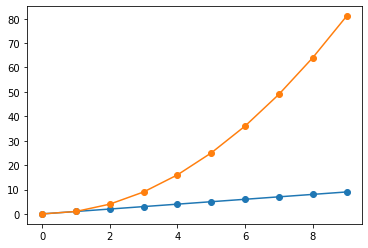

In [22]:
# basic plot
import matplotlib.pyplot as plt
x = np.arange(10)
x2 = x**2
plt.figure()
plt.plot(x, x, '-o', x, x2, '-o')
plt.show()

In [ ]:
df.drop('column_name', axis=1, inplace=True)

In [18]:
# fill na with mean
values = [1,2,3,np.nan,4,5,np.nan]
df = pd.DataFrame({'values':values})
print(df)
df['values'].fillna(value=df['values'].mean(), inplace=True)
print(df)

   values
0     1.0
1     2.0
2     3.0
3     NaN
4     4.0
5     5.0
6     NaN
   values
0     1.0
1     2.0
2     3.0
3     3.0
4     4.0
5     5.0
6     3.0


In [21]:
# replace all non-characters with ''
text = ["asld92 293","kj29190 92","23j2ju10"]
df = pd.DataFrame({'text':text})
df['text'].str.replace('[^a-zA-Z]', '', regex=True)

0    asld
1      kj
2     jju
Name: text, dtype: object

## Data exploration

### read csv

In [22]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

### add random np.nan

In [41]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
def add_missing(df):
    df = df.copy()
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            if random.random() > .9:
                df.iloc[i, j] = np.nan
    return df
iris_m = add_missing(iris)

### clean data

In [38]:
df = pd.DataFrame({"price":["1.45","2.55","","4.23"],
                  "other":["$209.23","$29.44","$193.42",""]})

In [40]:
def clean_column(df, column):
    solution = df.copy()
    solution[column] = solution[column].str.replace("[^0-9\\.\\-]", "")
    solution[column] = np.where(solution[column]=="", "0", solution[column])
    return solution
clean_column(df, 'other')

,price,other
0,1.45,209.23
1,2.55,29.44
2,,193.42
3,4.23,0


### drop np.nan

In [153]:
iris_m.isnull().any()

sepal_length    True
sepal_width     True
petal_length    True
petal_width     True
species         True
dtype: bool

In [154]:
iris_m.dropna(inplace=True)

In [155]:
iris_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  86 non-null     float64
 1   sepal_width   86 non-null     float64
 2   petal_length  86 non-null     float64
 3   petal_width   86 non-null     float64
 4   species       86 non-null     object 
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


### count values

In [47]:
iris['species'].value_counts()

versicolor    29
virginica     28
setosa        27
Name: species, dtype: int64

### mean of x values by y group

In [49]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.103704,3.522222,1.437037,0.262963
versicolor,6.013793,2.768966,4.362069,1.362069
virginica,6.532143,2.939286,5.446429,2.057143


### category of max value of grouped means

In [24]:
iris.groupby('species')['sepal_length'].mean().idxmax()

'virginica'

### replace values

In [50]:
iris['species']=np.where(iris['species'] =='setosa', 'versicolor', iris['species'])

In [51]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
versicolor,5.575000,3.132143,2.951786,0.832143
virginica,6.532143,2.939286,5.446429,2.057143


In [52]:
iris['species'].value_counts()

versicolor    56
virginica     28
Name: species, dtype: int64

### New column from old column

In [76]:
iris['sw_lt3']=np.where(iris['sepal_width'] < 3, "yes", "no")

### Cross tab

In [79]:
pd.crosstab(iris.sw_lt3, iris.species)

species,setosa,versicolor,virginica
sw_lt3,,,
no,48,16,29
yes,2,34,21


### Bar Plot from Frequency Table

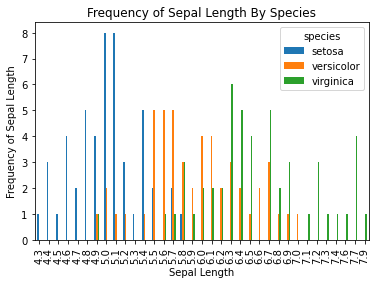

In [89]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
pd.crosstab(iris.sepal_length,iris.species).plot(kind='bar')
plt.title('Frequency of Sepal Length By Species')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency of Sepal Length')
plt.show()

### Scatter Plot

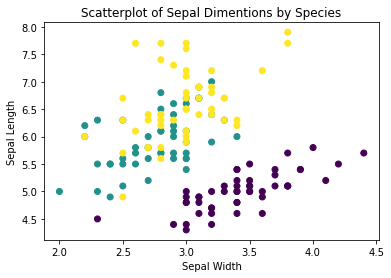

In [72]:
colors = np.where(iris.species=="setosa", 0, np.nan)
colors[iris.species=="versicolor"] = 1
colors[iris.species=="virginica"] = 2
plt.scatter(iris.sepal_width, iris.sepal_length, c=colors, cmap='viridis')
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.title('Scatterplot of Sepal Dimentions by Species')
plt.show()

### Indexing

#### no indexer
is exclusive

In [90]:
# no indexer
iris['sepal_width'][0]

3.5

In [99]:
iris[0:3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [91]:
iris[iris.sepal_width > 3]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
...,...,...,...,...,...
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica


#### .loc indexer
Used to reference the explicit index (named), is inclusive of last

In [92]:
iris.loc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [94]:
iris.loc[0:3,'sepal_width':'petal_width']

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2


#### .iloc indexer
Used to reference the implicit index (number), is exclusive of last

In [95]:
iris.iloc[0] # same

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [97]:
iris.iloc[0:4, 1:4] # exclusive indexing

,sepal_width,petal_length,petal_width
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2


isnull(): Generate a boolean mask indicating missing values

notnull(): Opposite of isnull()

dropna(): Return a filtered version of the data

fillna(): Return a copy of the data with missing values filled or imputed

### Concat
warning: indicies can overlap!

In [105]:
# vertical stack
iris_1 = iris.iloc[0:4]
iris_2 = iris.iloc[4:8]
pd.concat([iris_1, iris_2])

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa


In [111]:
# horizontal stack
iris_1 = iris.iloc[0:4,0:2]
iris_2 = iris.iloc[0:4,2:]
pd.concat([iris_1, iris_2], axis=1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [116]:
df_1 = pd.DataFrame({'a':[1,2,3],
                    'b':[2,3,4]})
df_2 = pd.DataFrame({'b':[5,6],
                    'c':[7,8]})
pd.concat([df_1,df_2]) # default outer join

,a,b,c
0,1.0,2,NaN
1,2.0,3,NaN
2,3.0,4,NaN
0,NaN,5,7.0
1,NaN,6,8.0


In [117]:
pd.concat([df_1,df_2], join='inner')

,b
0,2
1,3
2,4
0,5
1,6


In [ ]:
df_1.append(df_2) # same as outer pd.concat

### Merge
discards the index, automatically merges on shared column

on="employee" | left_on="employee", right_on="name"

In [129]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
df3 = pd.merge(df1,df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [130]:
# automatically does many to one
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [131]:
# also does many to many
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [132]:
# on index
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
pd.merge(df1a, df2a, left_index=True, right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [136]:
# join (need to specify index)
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


In [138]:
# mix index and column name
pd.merge(df1a, df2, left_index=True, right_on='employee')

,group,employee,hire_date
1,Accounting,Bob,2008
2,Engineering,Jake,2012
0,Engineering,Lisa,2004
3,HR,Sue,2014


In [139]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [141]:
pd.merge(df6, df7, how='outer')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [142]:
pd.merge(df6, df7, how='left')

,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


In [143]:
# overlapping column names
pd.merge(df1, df1, on="employee", suffixes=["_L", "_R"])

,employee,group_L,group_R
0,Bob,Accounting,Accounting
1,Jake,Engineering,Engineering
2,Lisa,Engineering,Engineering
3,Sue,HR,HR


### Drop

In [145]:
# column
df3.drop('hire_date', axis=1)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


In [146]:
# row
df3.drop(0) # default behavior

,employee,group,hire_date
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


### Merges and missings

In [183]:
iris_m = add_missing(iris)
iris_m.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,NaN,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [164]:
iris_m.loc[iris_m['species'].isnull(), 'sepal_width'].unique()

array([3.35714286, 3.        , 4.        , 3.4       ,        nan,
       3.5       , 2.68947368, 2.4       , 2.9       , 2.5       ,
       2.7       , 2.6       ])

In [158]:
iris_m['species'].value_counts()

versicolor    21
setosa        20
virginica     20
Name: species, dtype: int64

In [184]:
iris_m.loc[(iris_m['species'] == 'versicolor') & (iris_m['sepal_width'].isnull()), 'sepal_width'] = iris_m.loc[iris['species'] == 'versicolor', 'sepal_width'].mean()
iris_m.loc[(iris_m['species'] == 'setosa') & (iris_m['sepal_width'].isnull()), 'sepal_width'] = iris_m.loc[iris['species'] == 'setosa', 'sepal_width'].mean()
iris_m.loc[(iris_m['species'] == 'virginica') & (iris_m['sepal_width'].isnull()), 'sepal_width'] = iris_m.loc[iris['species'] == 'virginica', 'sepal_width'].mean()

In [174]:
iris_m

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.357143,1.4,0.2,setosa
1,4.9,3.357143,1.4,NaN,setosa
2,NaN,3.357143,NaN,0.2,NaN
3,NaN,3.357143,NaN,0.2,setosa
4,5.0,3.357143,1.4,0.2,setosa
...,...,...,...,...,...
144,NaN,2.987500,5.7,NaN,virginica
146,6.3,NaN,5.0,NaN,virginica
147,NaN,2.987500,NaN,2.0,virginica
148,6.2,3.400000,5.4,NaN,NaN


In [186]:
iris_m.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.500000,1.4,0.2,NaN
1,4.9,3.000000,1.4,0.2,setosa
2,4.7,3.200000,1.3,0.2,setosa
3,NaN,3.100000,1.5,0.2,setosa
4,5.0,3.600000,1.4,0.2,setosa
5,5.4,3.900000,1.7,0.4,setosa
6,4.6,3.400000,1.4,0.3,setosa
7,5.0,3.400000,1.5,0.2,setosa
8,4.4,2.900000,1.4,0.2,setosa
9,4.9,3.100000,1.5,0.1,setosa


In [188]:
iris.query('species=="setosa" & petal_length > 1.5')

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.4,3.9,1.7,0.4,setosa
11,4.8,3.4,1.6,0.2,setosa
18,5.7,3.8,1.7,0.3,setosa
20,5.4,3.4,1.7,0.2,setosa
23,5.1,3.3,1.7,0.5,setosa
24,4.8,3.4,1.9,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
26,5.0,3.4,1.6,0.4,setosa
29,4.7,3.2,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa


### Sorting

In [191]:
iris['sepal_ratio'] = iris['sepal_length'] / iris['sepal_width']
iris.sort_values(by='sepal_ratio', ascending=False, inplace=True)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
118,7.7,2.6,6.9,2.3,virginica,2.961538
68,6.2,2.2,4.5,1.5,versicolor,2.818182
122,7.7,2.8,6.7,2.0,virginica,2.750000
87,6.3,2.3,4.4,1.3,versicolor,2.739130
119,6.0,2.2,5.0,1.5,virginica,2.727273
...,...,...,...,...,...,...
46,5.1,3.8,1.6,0.2,setosa,1.342105
33,5.5,4.2,1.4,0.2,setosa,1.309524
15,5.7,4.4,1.5,0.4,setosa,1.295455
22,4.6,3.6,1.0,0.2,setosa,1.277778


### Aggregation

In [6]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [7]:
iris.groupby('species')['sepal_width'].mean()

species
setosa        3.428
versicolor    2.770
virginica     2.974
Name: sepal_width, dtype: float64

In [8]:
iris.groupby('species')['sepal_width'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,3.428,0.379064,2.3,3.200,3.4,3.675,4.4
versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


In [12]:
iris.groupby('species').aggregate([np.min, np.median, np.max])

sepal_length             sepal_width             petal_length  \
                   amin median amax        amin median amax         amin   
species                                                                    
setosa              4.3    5.0  5.8         2.3    3.4  4.4          1.0   
versicolor          4.9    5.9  7.0         2.0    2.8  3.4          3.0   
virginica           4.9    6.5  7.9         2.2    3.0  3.8          4.5   

                       petal_width              
           median amax        amin median amax  
species                                         
setosa       1.50  1.9         0.1    0.2  0.6  
versicolor   4.35  5.1         1.0    1.3  1.8  
virginica    5.55  6.9         1.4    2.0  2.5

### Filter

In [15]:
# filter on groups
# function returns group values, not individual
def filter_sw(x):
    return x['sepal_width'].mean() > 3
iris.groupby('species').filter(filter_sw) # only setosa mean > 3

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


### transform

In [17]:
iris.groupby('species').transform(lambda x: x - x.mean())

,sepal_length,sepal_width,petal_length,petal_width
0,0.094,0.072,-0.062,-0.046
1,-0.106,-0.428,-0.062,-0.046
2,-0.306,-0.228,-0.162,-0.046
3,-0.406,-0.328,0.038,-0.046
4,-0.006,0.172,-0.062,-0.046
...,...,...,...,...
145,0.112,0.026,-0.352,0.274
146,-0.288,-0.474,-0.552,-0.126
147,-0.088,0.026,-0.352,-0.026
148,-0.388,0.426,-0.152,0.274


### apply

In [19]:
def norm_by_data1(x):
    # x is a DataFrame of group values
    x['sepal_width'] /= x['sepal_width'].sum()
    return x

iris.groupby('species').apply(norm_by_data1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,0.020420,1.4,0.2,setosa
1,4.9,0.017503,1.4,0.2,setosa
2,4.7,0.018670,1.3,0.2,setosa
3,4.6,0.018086,1.5,0.2,setosa
4,5.0,0.021004,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,0.020175,5.2,2.3,virginica
146,6.3,0.016812,5.0,1.9,virginica
147,6.5,0.020175,5.2,2.0,virginica
148,6.2,0.022865,5.4,2.3,virginica


In [20]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['sepal_width'] /= x['sepal_width'].sum()
    return x['sepal_width']

iris.groupby('species').apply(norm_by_data2)

species       
setosa     0      0.020420
           1      0.017503
           2      0.018670
           3      0.018086
           4      0.021004
                    ...   
virginica  145    0.020175
           146    0.016812
           147    0.020175
           148    0.022865
           149    0.020175
Name: sepal_width, Length: 150, dtype: float64

### two group keys

In [21]:
iris['key'] = np.random.randint(1, 3, iris.shape[0])

In [24]:
iris.groupby(['species','key']).mean()

sepal_length  sepal_width  petal_length  petal_width
species    key                                                      
setosa     1        5.009524     3.466667      1.519048     0.242857
           2        5.003448     3.400000      1.420690     0.248276
versicolor 1        5.987500     2.795833      4.266667     1.333333
           2        5.888462     2.746154      4.253846     1.319231
virginica  1        6.456522     3.004348      5.473913     2.069565
           2        6.700000     2.948148      5.618519     1.988889

### cutting

In [33]:
# by quantiles
pd.qcut(iris['sepal_width'], 2)

0        (3.0, 4.4]
1      (1.999, 3.0]
2        (3.0, 4.4]
3        (3.0, 4.4]
4        (3.0, 4.4]
           ...     
145    (1.999, 3.0]
146    (1.999, 3.0]
147    (1.999, 3.0]
148      (3.0, 4.4]
149    (1.999, 3.0]
Name: sepal_width, Length: 150, dtype: category
Categories (2, interval[float64]): [(1.999, 3.0] < (3.0, 4.4]]

In [34]:
# by cut points
pd.cut(iris['sepal_width'], [2.3, 2.7, 3.1, 4])

0      (3.1, 4.0]
1      (2.7, 3.1]
2      (3.1, 4.0]
3      (2.7, 3.1]
4      (3.1, 4.0]
          ...    
145    (2.7, 3.1]
146    (2.3, 2.7]
147    (2.7, 3.1]
148    (3.1, 4.0]
149    (2.7, 3.1]
Name: sepal_width, Length: 150, dtype: category
Categories (3, interval[float64]): [(2.3, 2.7] < (2.7, 3.1] < (3.1, 4.0]]

### more quartiles

In [39]:
quartiles = np.percentile(iris['sepal_width'], [25, 50, 75])
quartiles

array([2.8, 3. , 3.3])

### Pivot tables

In [27]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [28]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [29]:
# same as:
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [31]:
# with multiple indicies
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [32]:
# with multiple indicies for row and column
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

In [35]:
# different types of aggregation
titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [36]:
# group totals
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [37]:
# specify agg function
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='sum', margins=True)

class,First,Second,Third,All
sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


### Separate string into dummies list

In [49]:
df = pd.DataFrame({"s":['a|b', 'a', 'a|c']})
pd.concat([df, df['s'].str.get_dummies(sep='|')], axis=1)

,s,a,b,c
0,a|b,1,1,0
1,a,1,0,0
2,a|c,1,0,1


## Dates

In [ ]:
# Code 	Meaning 	Time span (relative)	Time span (absolute)
# Y 	Year 		± 9.2e18 years 			[9.2e18 BC, 9.2e18 AD]
# M 	Month 		± 7.6e17 years 			[7.6e17 BC, 7.6e17 AD]
# W 	Week 		± 1.7e17 years 			[1.7e17 BC, 1.7e17 AD]
# D 	Day 		± 2.5e16 years 			[2.5e16 BC, 2.5e16 AD]
# h 	Hour 		± 1.0e15 years 			[1.0e15 BC, 1.0e15 AD]
# m 	Minute 		± 1.7e13 years 			[1.7e13 BC, 1.7e13 AD]
# s 	Second 		± 2.9e12 years 			[ 2.9e9 BC, 2.9e9 AD]
# ms 	Millisecond	± 2.9e9 years 			[ 2.9e6 BC, 2.9e6 AD]
# us 	Microsecond	± 2.9e6 years 			[290301 BC, 294241 AD]
# ns 	Nanosecond 	± 292 years 			[ 1678 AD, 2262 AD]
# ps 	Picosecond 	± 106 days 				[ 1969 AD, 1970 AD]
# fs 	Femtosecond	± 2.6 hours 			[ 1969 AD, 1970 AD]
# as 	Attosecond 	± 9.2 seconds 			[ 1969 AD, 1970 AD]

In [62]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [63]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [64]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [65]:
date.strftime('%A')

'Saturday'

In [66]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### Datetime index

In [67]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [68]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [70]:
# better:
pd.date_range("2015-07-03", periods=10, freq='D')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-11', '2015-07-12'],
              dtype='datetime64[ns]', freq='D')

In [75]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


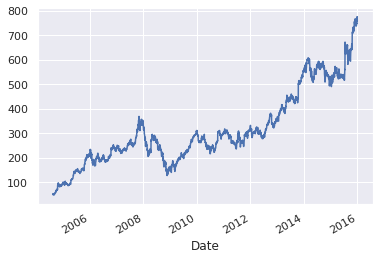

In [76]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
goog = goog['Close']
goog.plot();

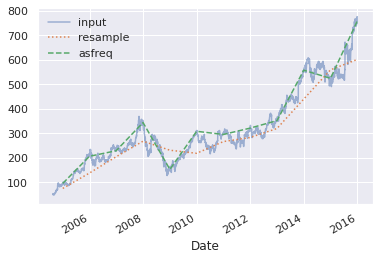

In [77]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

## Plots

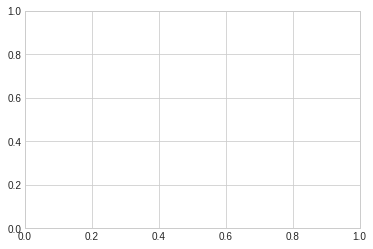

In [54]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [ ]:
fig = plt.figure()
ax = plt.axes()

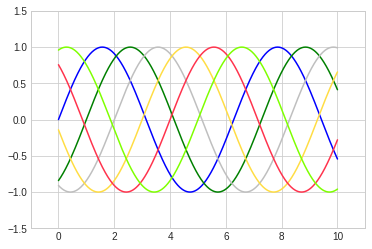

In [59]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse')  # all HTML color names supported
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

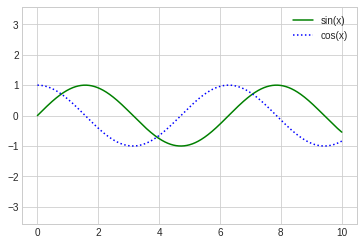

In [60]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend();

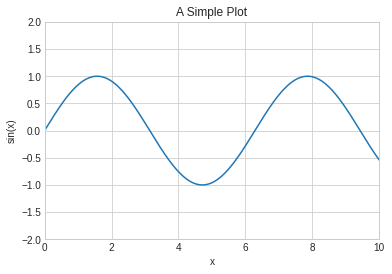

In [61]:
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');

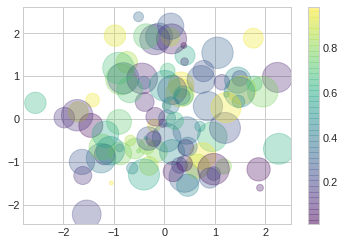

In [81]:
# Scatter
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale

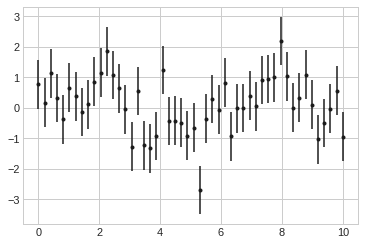

In [80]:
# error bars
plt.style.use('seaborn-whitegrid')
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)
plt.errorbar(x, y, yerr=dy, fmt='.k');

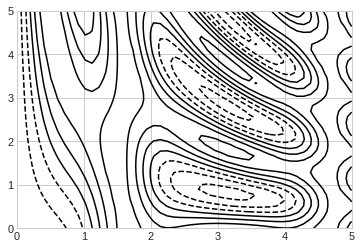

In [82]:
# contour
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z, colors='black');

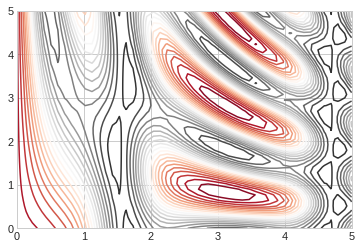

In [83]:
plt.contour(X, Y, Z, 20, cmap='RdGy'); #color map = cmap

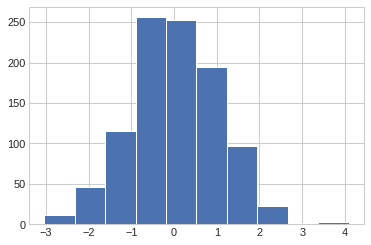

In [85]:
# histogram
data = np.random.randn(1000)
plt.hist(data);

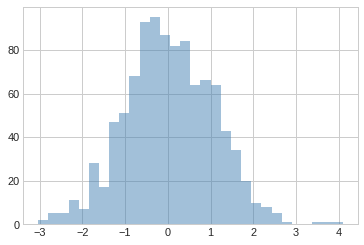

In [87]:
plt.hist(data, bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

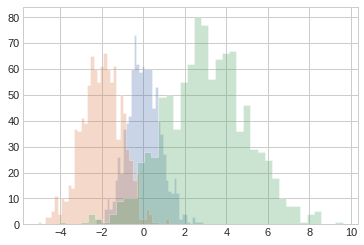

In [89]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

## Models Scikit-learn

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [5]:
# with train/test sets
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
from sklearn.metrics import accuracy_score
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

In [6]:
# with cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

### Categorical Features

In [7]:
# vectorize features
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [8]:
# get the feature names
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

### Text Features

In [ ]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

In [9]:
# Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [10]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [11]:
# Term frequency inverse document frequency
# weights the word counts by a measure of how
# often they appear in the documents
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


tf-idf scales down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus

### Standardization
needed for models that are based on distance computation
- Principal Component Analysis
- Clustering
- KNN
- SVM
- Lasso and Ridge Regression
- Before measuring variable importance in regression models

### Linear Regression

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [76]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris = iris.loc[iris['species'] != "setosa"]
iris['species_num'] = np.where(iris['species']=="virginica", 1, 0)

In [77]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
50,7.0,3.2,4.7,1.4,versicolor,0
51,6.4,3.2,4.5,1.5,versicolor,0
52,6.9,3.1,4.9,1.5,versicolor,0
53,5.5,2.3,4.0,1.3,versicolor,0
54,6.5,2.8,4.6,1.5,versicolor,0


In [83]:
X = iris.loc[:, 'sepal_length':'petal_width']
y = iris.loc[:, 'species_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [84]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [85]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[11,  2],
       [ 0, 12]])

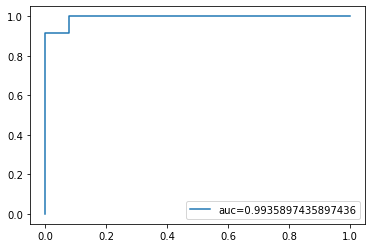

In [86]:
import matplotlib.pyplot as plt
y_pred_proba = log_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

### KNN

Why to standardize before fitting a ML model? Well, the idea is simple. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting. RobustScaler is robust to outliers compared to StandardScaler

In [94]:
from sklearn.preprocessing import StandardScaler
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
scaler = StandardScaler()
X = iris.loc[:, 'sepal_length':'petal_width']
y = iris.loc[:, 'species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [95]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [96]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0,  0],
       [ 0, 12,  4],
       [ 0,  0,  9]])

In [101]:
# find k for lowest test error rate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# param_grid needs the name plus two underscores for each param
# knn__ before n_neighbors param
param_grid = {'knn__n_neighbors': np.arange(1,10)}
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                     ('knn', KNeighborsClassifier())])
knn_gscv = GridSearchCV(pipeline, param_grid, cv=5)
knn_gscv.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [103]:
print("Best parameter (CV score=%0.3f):" % knn_gscv.best_score_)
print(knn_gscv.best_params_)

Best parameter (CV score=0.967):
{'knn__n_neighbors': 6}


In [109]:
knn_gscv.cv_results_

{'mean_fit_time': array([0.0025382 , 0.00252666, 0.00239067, 0.00234866, 0.00233788,
        0.00232081, 0.00230298, 0.00231061, 0.0022963 ]),
 'std_fit_time': array([1.63926254e-04, 3.25939757e-04, 4.47329170e-05, 2.32484400e-05,
        2.58164059e-05, 1.00049481e-05, 1.39987241e-05, 2.42923145e-05,
        3.46027423e-06]),
 'mean_score_time': array([0.00201974, 0.0020442 , 0.00192032, 0.00192294, 0.00189958,
        0.00194697, 0.00202866, 0.0019805 , 0.00190659]),
 'std_score_time': array([1.06936258e-04, 2.79138656e-04, 2.32736592e-05, 1.92624507e-05,
        9.67121684e-06, 8.77091889e-05, 1.53466645e-04, 1.50759999e-04,
        5.68896906e-06]),
 'param_knn__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'knn__n_neighbors': 1},
  {'knn__n_neighbors': 2},
  {'knn__n_neighbors': 3},
  {'knn__n_neighb

In [110]:
y_pred = knn_gscv.predict(X)

In [111]:
cnf_matrix = confusion_matrix(y, y_pred)
cnf_matrix

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  4, 46]])

In [112]:
accuracy_score(y, y_pred)

0.9666666666666667

#### data transformer pipeline example
from: https://medium.com/bigdatarepublic/integrating-pandas-and-scikit-learn-with-pipelines-f70eb6183696

alt: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

In [ ]:
# create iris with categorical predictor
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris['sepal_width_cat'] = pd.qcut(iris['sepal_width'], 4)
iris.drop('sepal_width_cat', axis=1, inplace=True)

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler
class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])

In [122]:
param_grid = {'knn__n_neighbors': np.arange(1,10)}

transformer = Pipeline([
    ('features', FeatureUnion(n_jobs=1, transformer_list=[
        # Part 1
        ('boolean', Pipeline([
            ('selector', TypeSelector('bool')),
        ])),  # booleans close
        
        ('numericals', Pipeline([
            ('selector', TypeSelector(np.number)),
            ('scaler', StandardScaler()),
        ])),  # numericals close
        
        # Part 2
        ('categoricals', Pipeline([
            ('selector', TypeSelector('category')),
            ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ]))  # categoricals close
    ])),  # features close
    ('knn', KNeighborsClassifier()) # knn classifier
])  # pipeline close

In [124]:
knn_gscv = GridSearchCV(transformer, param_grid, cv=5)

In [126]:
knn_gscv.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('features',
                                        FeatureUnion(n_jobs=1,
                                                     transformer_list=[('boolean',
                                                                        Pipeline(steps=[('selector',
                                                                                         TypeSelector(dtype='bool'))])),
                                                                       ('numericals',
                                                                        Pipeline(steps=[('selector',
                                                                                         TypeSelector(dtype=<class 'numpy.number'>)),
                                                                                        ('scaler',
                                                                                         StandardScaler())])),
                              

In [127]:
print("Best parameter (CV score=%0.3f):" % knn_gscv.best_score_)
print(knn_gscv.best_params_)

Best parameter (CV score=0.967):
{'knn__n_neighbors': 6}


In [138]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
factor_levels = list(set(iris['species']))
color_levels = ['#2596be','#be2596','#96be25']
color_map = dict(zip(factor_levels, color_levels))
colors = iris['species'].apply(lambda x: color_map[x])

0      #be2596
1      #be2596
2      #be2596
3      #be2596
4      #be2596
        ...   
145    #2596be
146    #2596be
147    #2596be
148    #2596be
149    #2596be
Name: species, Length: 150, dtype: object

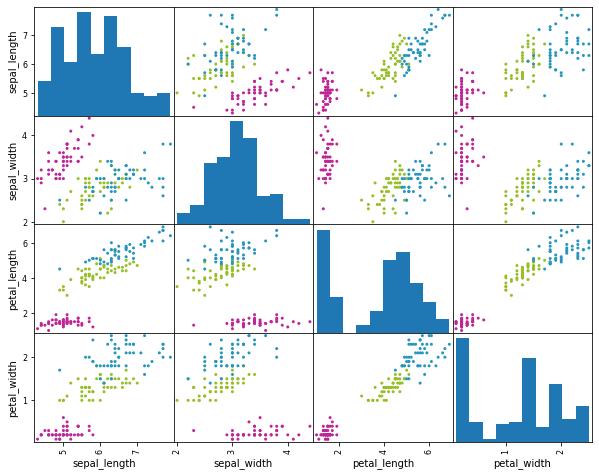

In [139]:
pd.plotting.scatter_matrix(iris, alpha=1, figsize=(10,8), c=colors)
plt.title('Pair plots of Iris by Species')
plt.show()